# Clean the PELIC dataset
This notebook is to clean the PELIC dataset.

In [2]:
# Import libraries
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
nlp = spacy.load('en_core_web_sm')

In [113]:
# Read the data
df = pd.read_csv('../data/PELIC_compiled.csv').drop(['Unnamed: 0'], axis=1)

In [114]:
# Look at the head
df.head()

,level,L1,question_type,question,answer,length,num_sentences,avg_sentence_length,total_tokens
0,4,Arabic,Paragraph writing,Write a paragraph about a relatioship that is...,I met my friend Nife while I was studying in a...,923.0,12.0,16.083333,193.0
1,4,Thai,Paragraph writing,Write a paragraph about a relatioship that is...,"Ten years ago, I met a women on the train betw...",668.0,10.0,15.600000,156.0
2,4,Turkish,Paragraph writing,"In five sentences or less, give instructions o...",In my country we usually don't use tea bags. F...,278.0,5.0,14.400000,72.0
3,4,Turkish,Paragraph writing,"How do you organize the instructions: by time,...",I organized the instructions by time.,37.0,1.0,7.000000,7.0
4,4,Korean,Paragraph writing,"In five sentences or less, give instructions o...","First, prepare a port, loose tea, and cup.\nSe...",290.0,5.0,15.600000,78.0


In [115]:
# Look at the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45775 entries, 0 to 45774
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level                45775 non-null  int64  
 1   L1                   45775 non-null  object 
 2   question_type        45775 non-null  object 
 3   question             45775 non-null  object 
 4   answer               45775 non-null  object 
 5   length               45775 non-null  float64
 6   num_sentences        45775 non-null  float64
 7   avg_sentence_length  45775 non-null  float64
 8   total_tokens         45775 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [116]:
# Change the text columns to strings to make sure that they're processed properly later on;
# Some of the objects contain integers, but when we do NLP, we want them to be treated as strings
df['question'] = df['question'].astype('string')
df['answer'] = df['answer'].astype('string')
df['question_type'] = df['question_type'].astype('string')
df['L1'] = df['L1'].astype('string')

In [117]:
# Look at the info again to make sure the types were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45775 entries, 0 to 45774
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level                45775 non-null  int64  
 1   L1                   45775 non-null  string 
 2   question_type        45775 non-null  string 
 3   question             45775 non-null  string 
 4   answer               45775 non-null  string 
 5   length               45775 non-null  float64
 6   num_sentences        45775 non-null  float64
 7   avg_sentence_length  45775 non-null  float64
 8   total_tokens         45775 non-null  float64
dtypes: float64(4), int64(1), string(4)
memory usage: 3.1 MB


Check to see if there are one-word answers in the dataframe.

In [118]:
df.total_tokens.describe()

count    45775.000000
mean       104.848192
std        178.623361
min          1.000000
25%         10.000000
50%         27.000000
75%        130.000000
max       2789.000000
Name: total_tokens, dtype: float64

The dataframe contains one-word answers. This project focuses on classifying ESL learner writing. To get good data for each level, we'll need the answer to contain at least a subject and a verb. Instead of setting an arbitrary minimum length, or a minimum number of sentences, I'm going to set filter out answers that don't contain at least one subject and verb. This way, I won't be throwing away data from the beginner levels that may be only one or two short sentences.

In [119]:
# Define a function to filter the data for answers that contain at least one subject and verb
def contains_subject_and_verb(text):
    '''
    Checks to see if a document contains
    at least one subject and one verb
    '''
    doc = nlp(text)
    # Check if the text contains at least one subject and one verb
    return any(token.dep_ == "nsubj" for token in doc) and any(token.pos_ == "VERB" for token in doc)

def filter_rows_with_subject_and_verb(df):
    '''
    Applies the contains_subject_and_verb function
    '''
    # Apply the contains_subject_and_verb function to each row in the 'answer' column
    mask = df['answer'].apply(contains_subject_and_verb)
    # Filter the DataFrame to keep only the rows where the condition is True
    return df[mask]

In [120]:
# Apply the function
df = filter_rows_with_subject_and_verb(df)

In [121]:
# Save it in a csv because the function takes a long time to run
df.to_csv('../data/PELIC_sub_verb.csv')

In [5]:
df = pd.read_csv('../data/PELIC_sub_verb.csv').drop(['Unnamed: 0'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35158 entries, 0 to 35157
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level                35158 non-null  int64  
 1   L1                   35158 non-null  object 
 2   question_type        35158 non-null  object 
 3   question             35158 non-null  object 
 4   answer               35158 non-null  object 
 5   length               35158 non-null  float64
 6   num_sentences        35158 non-null  float64
 7   avg_sentence_length  35158 non-null  float64
 8   total_tokens         35158 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.4+ MB


In [7]:
df.head()

,level,L1,question_type,question,answer,length,num_sentences,avg_sentence_length,total_tokens
0,4,Arabic,Paragraph writing,Write a paragraph about a relatioship that is...,I met my friend Nife while I was studying in a...,923.0,12.0,16.083333,193.0
1,4,Thai,Paragraph writing,Write a paragraph about a relatioship that is...,"Ten years ago, I met a women on the train betw...",668.0,10.0,15.600000,156.0
2,4,Turkish,Paragraph writing,"In five sentences or less, give instructions o...",In my country we usually don't use tea bags. F...,278.0,5.0,14.400000,72.0
3,4,Turkish,Paragraph writing,"How do you organize the instructions: by time,...",I organized the instructions by time.,37.0,1.0,7.000000,7.0
4,4,Korean,Paragraph writing,"In five sentences or less, give instructions o...","First, prepare a port, loose tea, and cup.\nSe...",290.0,5.0,15.600000,78.0


In [8]:
# Drop any duplicates in the answer column
df.drop_duplicates(subset=['answer'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33612 entries, 0 to 33611
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level                33612 non-null  int64  
 1   L1                   33612 non-null  object 
 2   question_type        33612 non-null  object 
 3   question             33612 non-null  object 
 4   answer               33612 non-null  object 
 5   length               33612 non-null  float64
 6   num_sentences        33612 non-null  float64
 7   avg_sentence_length  33612 non-null  float64
 8   total_tokens         33612 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.3+ MB


In [10]:
df.question_type.value_counts()

question_type
Paragraph writing      15485
Short answer           14236
Essay                   3335
Sentence completion      281
Fill-in-the-blank        274
Audio recording            1
Name: count, dtype: int64

In [11]:
# Take a look at the question types to see if we should keep them in the dataframe.
# Paragraph writing
print(df[df.question_type == 'Paragraph writing'].answer.head())
print('\n',df[df.question_type == 'Paragraph writing'].level.value_counts())

0    I met my friend Nife while I was studying in a...
1    Ten years ago, I met a women on the train betw...
2    In my country we usually don't use tea bags. F...
3                I organized the instructions by time.
4    First, prepare a port, loose tea, and cup.\nSe...
Name: answer, dtype: object

 level
4    6782
5    4527
3    4071
2     105
Name: count, dtype: int64


In [206]:
# Short answer
print(df[df.question_type == 'Short answer'].answer.head())
print('\n',df[df.question_type == 'Short answer'].level.value_counts())

31         Can you give me a opinion about this matter?
32                       I own this car and this horse.
33                                         I own a car.
34                I don't have opinion about that thing
35    The opinion is my ider. \n\nSometimes i think ...
Name: answer, dtype: object

 level
5    5055
3    4374
4    4047
2     760
Name: count, dtype: int64


In [207]:
# Essay
print(df[df.question_type == 'Essay'].answer.head(10))
print('\n',df[df.question_type == 'Essay'].level.value_counts())

90    1. It has been said, "Not all learning takes p...
91    "Not all learning takes place in the classroom...
92    Some people prefer to eat at food stands or re...
93    In Taiwan, we have a proverb, "Far relative ca...
94    Some people said, "Not all learning takes plac...
95    Some people prefer eat out and some like doing...
96    "Not all learning takes place in the classroom...
97    There are many qualities of a good neighbor in...
98    Neighbors\nNeighbor is the people who live nea...
99    Giving your body the necessary substances to i...
Name: answer, dtype: object

 level
4    1980
5    1030
3     271
2      54
Name: count, dtype: int64


In [208]:
# Sentence completion
print(df[df.question_type == 'Sentence completion'].answer.head(10))
print('\n',df[df.question_type == 'Sentence completion'].level.value_counts())

3763                                  the research takes.
3764                          I used to live is very old.
3765                                which means so lucky.
3773                                 I have to stay here.
3774                              I live is so beautiful.
3775                        , is where I am studying now.
3776    the life of a winner will not be happy than he...
3784                          i would stay in pittsburgh.
3785                          is located pitts is so old.
3795                  I stayed for an hour was very clean
Name: answer, dtype: object

 level
4    167
5    114
Name: count, dtype: int64


In [209]:
# Fill-in-the-blank
print(df[df.question_type == 'Fill-in-the-blank'].answer.head(10))
print('\n',df[df.question_type == 'Fill-in-the-blank'].level.value_counts())

3761                                      who had studied
3792                                         havn't taken
3845                                    who were studying
3880                                     who were studing
3901                                   whom were studying
3919                                    who were stydying
4191      complain about the amout of homework they have.
4192    is always complaining about the amount of home...
4347                                  did she use to live
4348                                     Is she living in
Name: answer, dtype: object

 level
3    260
5     11
4      3
Name: count, dtype: int64


In [210]:
# Audio recording
print(df[df.question_type == 'Audio recording'].answer.head(10))
print('\n',df[df.question_type == 'Audio recording'].level.value_counts())

27160    My apartment is beautiful. I usually straighte...
Name: answer, dtype: object

 level
4    1
Name: count, dtype: int64


For the purposes of this project, I'm going to drop 'Audio recording,' 'Fill-in-the-blank,' and 'Sentence completion.' These answer types don't contain learner writing - rather, they contain learner answers to questions. We can see above that we're not throwing away a lot of data by removing 'Sentence completion' and 'Fill-in-the-blank.' Further, we don't want higher level answers to be represented by very short or incomplete answers.

In [12]:
# List of question types to drop
question_types_to_drop = ['Audio recording', 'Fill-in-the-blank', 'Sentence completion']

# Filter the DataFrame to keep only the rows where 'question_type' is not in the list
df = df[~df['question_type'].isin(question_types_to_drop)]

# If you want to reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

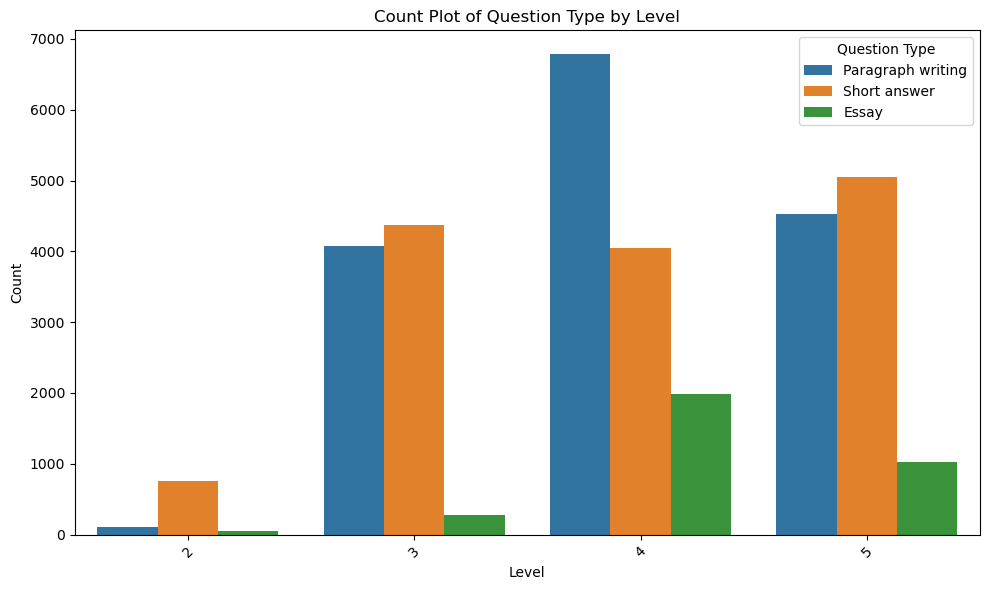

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='level', hue='question_type', data=df)
plt.title('Count Plot of Question Type by Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Question Type')
plt.tight_layout()
plt.show()

In [14]:
# Add a column that indicates the dataset so that it can be easily identified later
df['dataset'] = 'PELIC'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33056 entries, 0 to 33055
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level                33056 non-null  int64  
 1   L1                   33056 non-null  object 
 2   question_type        33056 non-null  object 
 3   question             33056 non-null  object 
 4   answer               33056 non-null  object 
 5   length               33056 non-null  float64
 6   num_sentences        33056 non-null  float64
 7   avg_sentence_length  33056 non-null  float64
 8   total_tokens         33056 non-null  float64
 9   dataset              33056 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.5+ MB


In [17]:
df.question_type.value_counts()

question_type
Paragraph writing    15485
Short answer         14236
Essay                 3335
Name: count, dtype: int64

In [25]:
len(df[df.isnull().any(axis=1)])

0

In [26]:
df.to_csv('../data/PELIC_sub_verb_cleaned.csv')